<a href="https://colab.research.google.com/github/abdonmorales/UTSA-PythonBootCamp/blob/project/Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
meteorite_df = pd.read_csv('https://data.nasa.gov/api/views/gh4g-9sfh/rows.csv?accessType=DOWNLOAD')
print(meteorite_df.info())
meteorite_mass_df = meteorite_df['mass (g)']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass (g)     45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45425 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB
None


In [10]:
# print(meteorite_mass_df)
mean = meteorite_df.mean()
print(mean)
print(mean['mass (g)'])

id          26889.735104
mass (g)    13278.078549
year         1991.828817
reclat        -39.122580
reclong        61.074319
dtype: float64
13278.078548601512


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


### Original Plot

[0 1 2 3 4]
[0 10 20 30 40 50]
[1 10 100 1000 10000 100000]

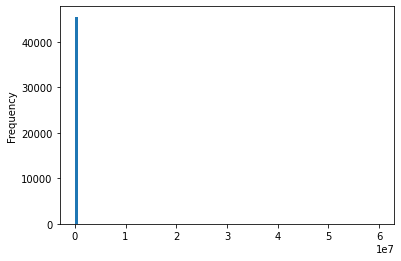

In [ ]:
fig, ax = plt.subplots(1)
ax = meteorite_mass_df.plot.hist(bins = 100)
plt.show()

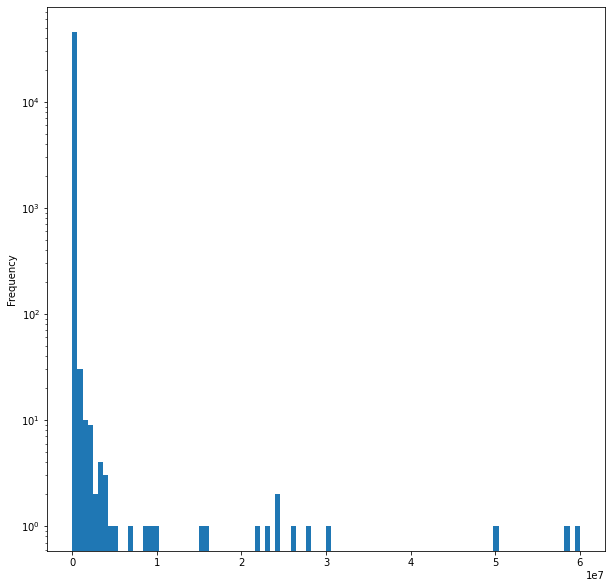

In [ ]:
fig, ax = plt.subplots(1,figsize = (10,10))
ax = meteorite_mass_df.plot.hist(bins = 100)
ax.semilogy()
plt.show()

#### Clipping

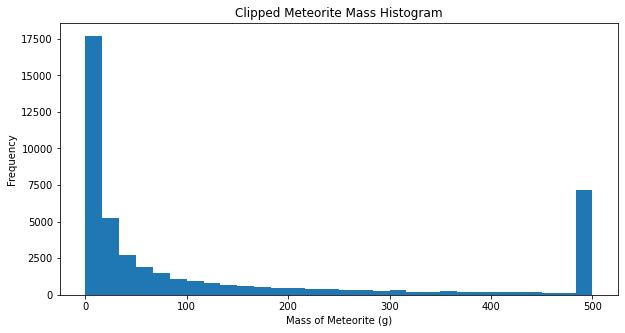

In [11]:
clipped_meteorite_mass = meteorite_mass_df.copy()

clipped_meteorite_mass = clipped_meteorite_mass.clip(lower = 0, upper = 500)

fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(clipped_meteorite_mass,bins=30)
ax.set_xlabel("Mass of Meteorite (g)")
ax.set_ylabel("Frequency")
ax.set_title("Clipped Meteorite Mass Histogram")
plt.show()

It is easy to see the results of clipping in the data. By clipping the data to a more reasonable value such as 500, we are able to greatly shorten the range of masses, allowing the histogram to be much more reasonable. We also do not lose samples, as all the samples above and below the cutoff are set to the max/min values respectively.

#### Log

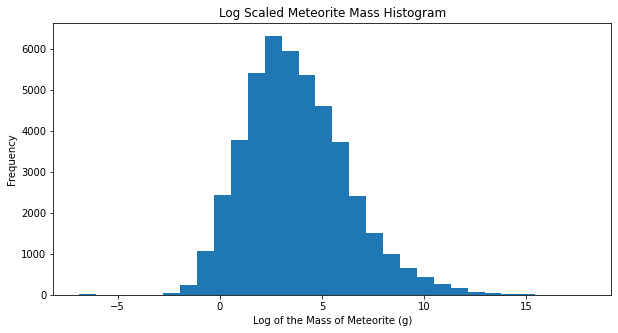

In [12]:
log_meteorite_mass = meteorite_mass_df.copy()
log_meteorite_mass[log_meteorite_mass == 0] = .001

log_meteorite_mass = log_meteorite_mass.apply(lambda x: np.log(x))

fig, ax = plt.subplots(1,figsize=(10,5))
ax.hist(log_meteorite_mass,bins=30)
ax.set_xlabel("Log of the Mass of Meteorite (g)")
ax.set_ylabel("Frequency")
ax.set_title("Log Scaled Meteorite Mass Histogram")
plt.show()

### Mean, Median, Mode
We will start with some basics from statistics, the mean, median, and mode of a set of data. This information is a great first step to understanding data, as it provides the average value that can be expected. These measurements can also be used as a step for other methods, such as normalizing data.

The example below will show how Pandas can be used to easily calculate these values from a Dataframe.

In [13]:
mean = clipped_meteorite_mass.mean()
median = clipped_meteorite_mass.median()
mode = clipped_meteorite_mass.mode()

print("Mean:",mean)
print("Median:",median)
print("Mode:",mode)

Mean: 135.26217345618076
Median: 32.6
Mode: 0    500.0
dtype: float64


### Standard Deviation and Variance
The standard deviation of a dataset is the amount of dispersion the values have. The wider range of values in the dataset, the larger the standard deviation. The variance is the square of the standard deviation, and is another measure of dispersion.

In [14]:
meteorite_std = clipped_meteorite_mass.std()
meteorite_var = clipped_meteorite_mass.var()

print("Standard Deviation", meteorite_std)
print("Variance", meteorite_var)

Standard Deviation 183.04559071861678
Variance 33505.688281527364


### Distribution of Data
Important values for the distribution of a dataset can also be found. These values are the same as the ones that can be found from a boxplot. These can include measurements of the max and min values, the median of the values, and the 25\% and 75\% quantiles in the dataset.


In [15]:
print("Min:", clipped_meteorite_mass.min())
print("25% Quantile:", clipped_meteorite_mass.quantile(.25))
print("50% Quantile:", clipped_meteorite_mass.quantile(.50))
print("75% Quantile:", clipped_meteorite_mass.quantile(.75))
print("Max:", clipped_meteorite_mass.max())


Min: 0.0
25% Quantile: 7.2
50% Quantile: 32.6
75% Quantile: 202.6
Max: 500.0


The skew of a dataset measures the distortion of the distribution of a dataset from the bell curve. In a bell curve, the distribution of values above and below the mean is symmetrical, while in many real-world datasets this isnt the case. 

In [16]:
skew = clipped_meteorite_mass.skew()
print("Skewness:",skew)

Skewness: 1.2129239443909756


Pandas also provides a function to calculate an array of information about a Dataframe and a second method for providing a list of statistics to collect:

In [17]:
meteorite_description = clipped_meteorite_mass.describe()
print(meteorite_description)

aggregate_info = clipped_meteorite_mass.agg(["min", "max", "median", "skew"])
print(aggregate_info)

count    45585.000000
mean       135.262173
std        183.045591
min          0.000000
25%          7.200000
50%         32.600000
75%        202.600000
max        500.000000
Name: mass (g), dtype: float64
min         0.000000
max       500.000000
median     32.600000
skew        1.212924
Name: mass (g), dtype: float64


### Box Plot

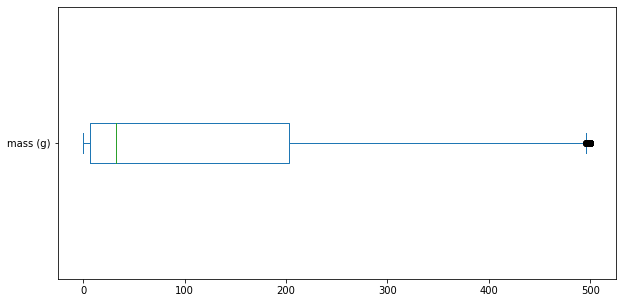

In [18]:
fig, ax = plt.subplots(1, figsize = (10,5))
ax = clipped_meteorite_mass.plot.box(vert = False)
plt.show()

### Histogram

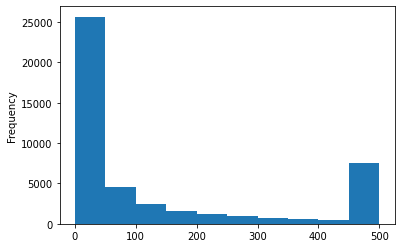

In [ ]:
fig, ax = plt.subplots(1)
ax = clipped_meteorite_mass.plot.hist()
plt.show()

Mean: 3.7604079948723865
Standard deviation: 2.5267828304349362


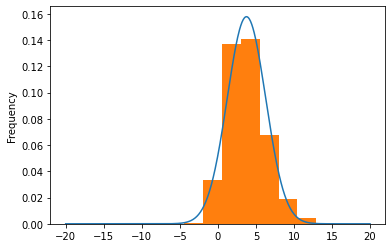

In [19]:
import scipy.stats

mass_description = log_meteorite_mass.describe()
mean = mass_description['mean']
std = mass_description['std']
print("Mean:",mean)
print("Standard deviation:",std)

normal_dist = stats.norm(loc = mean, scale = std)
x = np.linspace(-20,20,500)
y = normal_dist.pdf(x)

fig,ax = plt.subplots(1)
ax.plot(x, y)
ax = log_meteorite_mass.plot.hist(density=True)
plt.show()